# Surprise Housing - Advanced Regression Assignment

An advanced regression model to predict the actual value of the prospective properties.

| Dataset | Description | 
| --- | --- | 
| [Data Set](https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv) | This contains the sale of houses in Australia. | 
| [Data Definition](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt) | The details of the various variables are given in this file. | 

Steps we are going to follow:
1. Data understanding
2. Data cleaning
3. Data preparation  
4. Model building and evaluation 
5. Conclusion 

## Step 0: Pre-requisites

Importing all the required libraries for Advanced Regression

In [1]:
# Built-in libraries
import os
import ssl

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Code to handle SSL configuration

In [2]:
if not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

Create a DataFrame from the CSV URL provided.

In [3]:
# dataset_url = r"https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv"
dataset_url = r"https://raw.githubusercontent.com/rahul-nanwani/surprise-housing/master/dataset/train.csv"

df = pd.read_csv(dataset_url)

## Step 1: Data understanding 

Understand the dimensions, null values, and data types.

In [4]:
df.shape

(1460, 81)

In [5]:
pd.options.display.max_columns = 100

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data cleaning  

### Missing data

Check the columns with the high missing data ratio

In [9]:
df.isna().mean().sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

Remove the columns with high missing data

In [10]:
df.drop(df.columns[df.isna().mean()>0.3], axis=1, inplace=True)

The nulls in the columns *MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual,* and *GarageCond* indicates the absence of facility. 


In [11]:
facility_na = [
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    # "Alley",
    # "FireplaceQu",
    # "PoolQC",
    # "Fence",
    # "MiscFeature"
]

Let us fill in these nulls with `N.A.`

In [12]:
df.loc[:, facility_na] = df[facility_na].fillna(value="N.A.")

Let us check for the missing data again

In [13]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64

We can drop the records with nulls for the columns *MasVnrArea* and *Electrical* as they have very low count.

In [14]:
df.dropna(subset=['Electrical', 'MasVnrArea'], inplace=True)

In [15]:
df[["LotFrontage", "GarageYrBlt"]].describe()

,LotFrontage,GarageYrBlt
count,1194.000000,1370.000000
mean,70.027638,1978.353285
std,24.299302,24.685798
min,21.000000,1900.000000
25%,59.000000,1961.000000
50%,69.000000,1979.500000
75%,80.000000,2002.000000
max,313.000000,2010.000000


Let us fill *LotFrontage* by the median value in the respective neighbourhood, and *GarageYrBlt* by the median value.

In [16]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

In [17]:
df.reset_index(inplace=True, drop=True)

In [18]:
df.shape

(1451, 76)

### Unique data

Let us now check for the count of unique values in a column. 

In [19]:
df.nunique().sort_values(ascending=True).head(10)

CentralAir      2
Utilities       2
Street          2
LandSlope       3
BsmtHalfBath    3
HalfBath        3
PavedDrive      3
LotShape        4
LandContour     4
FullBath        4
dtype: int64

In [20]:
df.nunique().sort_values(ascending=False).head(10)

Id             1451
LotArea        1066
GrLivArea       858
BsmtUnfSF       777
1stFlrSF        748
TotalBsmtSF     717
SalePrice       657
BsmtFinSF1      633
GarageArea      438
2ndFlrSF        414
dtype: int64

We do not need *Id* column.

In [21]:
df.drop('Id', axis=1, inplace=True)

Check for duplicates

In [22]:
df.duplicated().sum()

0

### Correlation

In [23]:
correlation_matrix = df[df.select_dtypes(include=np.number).columns].corr()
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.368535,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,0.286684,0.042300,-0.044127,0.081531,-0.039167,-0.098027,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.368535,1.000000,0.335849,0.238146,-0.043074,0.120999,0.084383,0.196990,0.233809,0.052593,0.116831,0.380535,0.434532,0.077123,0.032044,0.385165,0.108248,0.006767,0.185010,0.055351,0.245349,-0.006039,0.332249,0.249904,0.062545,0.280627,0.338841,0.087889,0.139817,0.008008,0.064773,0.041232,0.175019,0.005415,0.006796,0.006047,0.348523
LotArea,-0.138039,0.335849,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,-0.024708,0.188012,0.269677,-0.024735,0.154761,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.238146,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,-0.184799,0.430817,0.400090,0.514909,0.600055,0.560502,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.043074,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,-0.137104,-0.167932,-0.139260,0.027720,0.025099,-0.076631,-0.051877,0.117217,-0.190170,-0.061030,0.014334,-0.081338,-0.055864,-0.020470,-0.305869,-0.184777,-0.151204,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.120999,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,0.150218,0.394285,0.285655,0.009036,-0.183738,0.199621,0.187085,-0.036897,0.469310,0.239672,-0.068781,-0.173867,0.097251,0.151023,0.776825,0.537508,0.478948,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.084383,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,0.182219,0.292985,0.243464,0.139804,-0.061980,0.288569,0.118850,-0.011137,0.440011,0.180316,-0.038566,-0.148432,0.193851,0.115594,0.614710,0.419764,0.371088,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,0.023156,0.196990,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127,0.390818,0.085017,0.026581,0.277238,0.202058,0.102898,-0.037698,0.280839,0.248800,0.249560,0.364381,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069241,0.233809,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,-0.064447,0.205944,0.647159,0.068473,0.056371,0.002778,-0.105617,-0.086643,0.044288,0.257828,0.148844,0.222531,0.295374,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.052593,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,-0.209806,0.106092,0.098654,-0.099445,0.014596,-0.008956,0.160068,0.070547,-0.075366,-0.031261,-0.015990,-0.040503,-0.035155,0.047318,-0.086082,-0.037494,-0.017641,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,-0.014977,0.031880,-0.010350


Drop the columns that are weakly correlated to the target variable i.e. *SalePrice*. Since we have a high number of variables this would reduce the noise from the model. 

In [24]:
columns = correlation_matrix.columns[(abs(correlation_matrix['SalePrice']) < 0.3)]

In [25]:
df.drop(columns, axis=1, inplace=True)

In [26]:
df.shape

(1451, 57)

Create a correlation matrix again

In [27]:
correlation_matrix = df[df.select_dtypes(include=np.number).columns].corr()
correlation_matrix

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.238146,0.120999,0.084383,0.196990,0.233809,0.380535,0.434532,0.077123,0.385165,0.185010,0.332249,0.249904,0.062545,0.280627,0.338841,0.087889,0.139817,0.348523
OverallQual,0.238146,1.000000,0.572129,0.550499,0.411699,0.236421,0.536836,0.476645,0.299021,0.594431,0.552939,0.430817,0.400090,0.514909,0.600055,0.560502,0.240728,0.303215,0.790085
YearBuilt,0.120999,0.572129,1.000000,0.590324,0.316345,0.250209,0.394285,0.285655,0.009036,0.199621,0.469310,0.097251,0.151023,0.776825,0.537508,0.478948,0.226960,0.185758,0.523274
YearRemodAdd,0.084383,0.550499,0.590324,1.000000,0.180136,0.128422,0.292985,0.243464,0.139804,0.288569,0.440011,0.193851,0.115594,0.614710,0.419764,0.371088,0.207514,0.224140,0.507488
MasVnrArea,0.196990,0.411699,0.316345,0.180136,1.000000,0.264469,0.363667,0.344255,0.174874,0.390818,0.277238,0.280839,0.248800,0.249560,0.364381,0.372990,0.159754,0.125461,0.477486
BsmtFinSF1,0.233809,0.236421,0.250209,0.128422,0.264469,1.000000,0.520098,0.442838,-0.135330,0.205944,0.056371,0.044288,0.257828,0.148844,0.222531,0.295374,0.205447,0.107279,0.383995
TotalBsmtSF,0.380535,0.536836,0.394285,0.292985,0.363667,0.520098,1.000000,0.818107,-0.171058,0.453975,0.322378,0.286315,0.338845,0.311821,0.434300,0.486298,0.234420,0.244411,0.613299
1stFlrSF,0.434532,0.476645,0.285655,0.243464,0.344255,0.442838,0.818107,1.000000,-0.198812,0.565895,0.378637,0.410612,0.409939,0.227913,0.439963,0.490839,0.238824,0.210229,0.606969
2ndFlrSF,0.077123,0.299021,0.009036,0.139804,0.174874,-0.135330,-0.171058,-0.198812,1.000000,0.690403,0.424084,0.617654,0.194213,0.068098,0.185302,0.140046,0.090956,0.210906,0.322840
GrLivArea,0.385165,0.594431,0.199621,0.288569,0.390818,0.205944,0.453975,0.565895,0.690403,1.000000,0.629257,0.825563,0.459401,0.220890,0.467223,0.469396,0.247992,0.330746,0.710073


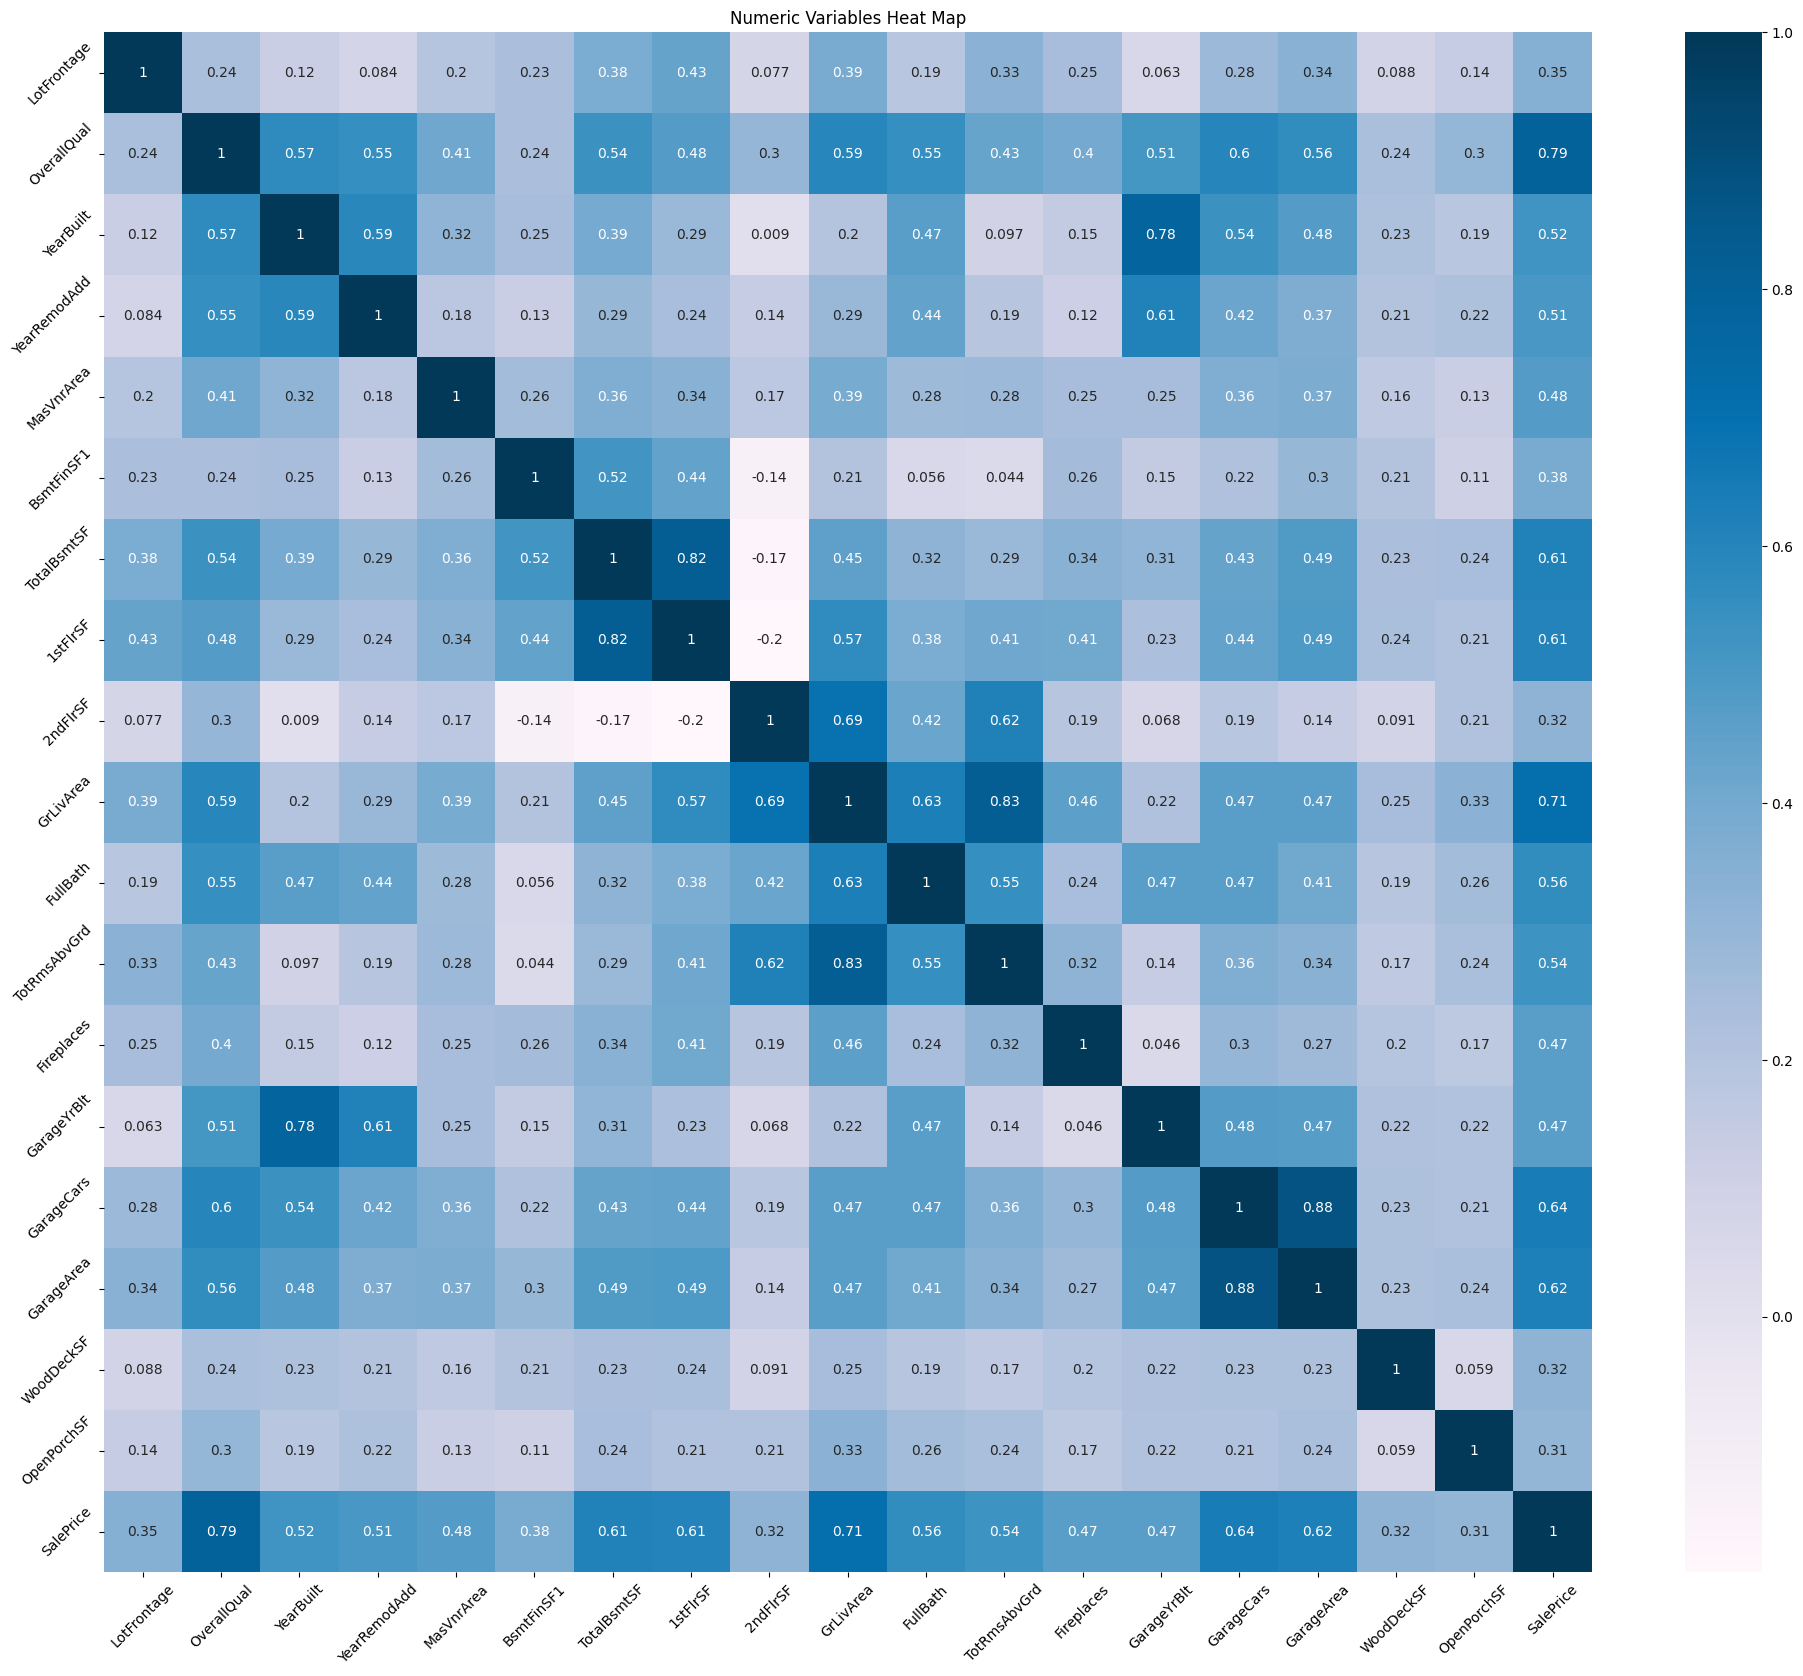

In [28]:
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, cmap='PuBu', annot=True)

plt.title("Numeric Variables Heat Map")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.show()

The variables *1stFlrSF, TotRmsAbvGrd, GarageYrBlt,* and *GarageArea* are highly correlated with other variables and must be dropped.

In [29]:
df.drop(["1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt", "GarageArea"], axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1451 non-null   object 
 1   LotFrontage    1451 non-null   float64
 2   Street         1451 non-null   object 
 3   LotShape       1451 non-null   object 
 4   LandContour    1451 non-null   object 
 5   Utilities      1451 non-null   object 
 6   LotConfig      1451 non-null   object 
 7   LandSlope      1451 non-null   object 
 8   Neighborhood   1451 non-null   object 
 9   Condition1     1451 non-null   object 
 10  Condition2     1451 non-null   object 
 11  BldgType       1451 non-null   object 
 12  HouseStyle     1451 non-null   object 
 13  OverallQual    1451 non-null   int64  
 14  YearBuilt      1451 non-null   int64  
 15  YearRemodAdd   1451 non-null   int64  
 16  RoofStyle      1451 non-null   object 
 17  RoofMatl       1451 non-null   object 
 18  Exterior

## Step 3: Data preparation 

In [31]:
continuous_variables = df.select_dtypes(include=np.number).columns

### Create dummy variables 

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
df.shape

(1451, 220)

### Train-Test Split

Spliting the train-test data into 70-30 split.

In [34]:
train_records, test_records = train_test_split(df, train_size=0.7, random_state=100)

train_records.shape, test_records.shape

((1015, 220), (436, 220))

In [35]:
train_records.reset_index(drop = True, inplace=True)
test_records.reset_index(drop = True, inplace=True)

### Rescaling

We need to scale continuous variables.

In [36]:
scaler = MinMaxScaler()

train_records[continuous_variables] = scaler.fit_transform(train_records[continuous_variables])
test_records[continuous_variables] = scaler.transform(test_records[continuous_variables])

In [37]:
train_records[continuous_variables].describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.168817,0.516502,0.724166,0.585731,0.064786,0.076438,0.174260,0.170972,0.207453,0.522167,0.203284,0.444581,0.104780,0.087395,0.206389
std,0.080621,0.171750,0.216586,0.339937,0.115137,0.082622,0.072927,0.212034,0.103646,0.182292,0.213376,0.184308,0.142301,0.126839,0.111512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.375000,0.594203,0.300000,0.000000,0.000000,0.130851,0.000000,0.130669,0.333333,0.000000,0.250000,0.000000,0.000000,0.133925
50%,0.167808,0.500000,0.739130,0.716667,0.000000,0.061836,0.161702,0.000000,0.196195,0.666667,0.333333,0.500000,0.000000,0.045704,0.180397
75%,0.202055,0.625000,0.927536,0.900000,0.105625,0.123937,0.212520,0.353995,0.259128,0.666667,0.333333,0.500000,0.196033,0.126143,0.253767
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split the records into X and y.

X: features
y: target variable

In [38]:
y_train = train_records.pop('SalePrice')
X_train = train_records

y_test = test_records.pop('SalePrice')
X_test = test_records

## Step 4: Model building and evaluation 

*Note: Since the assignment is to demonstrate the regularisation techniques, we do know that we are going to use regularisation. Hence, we can skip the process of feature selection as the regularisation will do that for us and give us better results.*

### Linear Regression

In [39]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

Calculate the metrics

In [40]:
def get_metrics(model, label):
    # Metrics on train data
    # R2 Score
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
    # RSS
    rss_train = np.sum(np.square(y_train - y_train_pred))
    # MSE 
    mse_train = mean_squared_error(y_train, y_train_pred)
    # RMSE 
    rmse_train = mse_train**0.5

    # Metrics on test data
    # R2 Score
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
    # RSS
    rss_test = np.sum(np.square(y_test - y_test_pred))
    # MSE
    mse_test = mean_squared_error(y_test, y_test_pred)
    # RMSE 
    rmse_test = mse_test**0.5

    return pd.DataFrame(
        {label: [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test, 
                 rmse_train, rmse_test]}, 
        index=["R2 Score (Train)", "R2 Score (Test)", "RSS (Train)", 
               "RSS (Test)", "MSE (Train)", "MSE (Test)", "RMSE (Train)", 
               "RMSE (Test)"])

In [41]:
lr_metrics = get_metrics(lm, "Linear")
lr_metrics

,Linear
R2 Score (Train),9.367446e-01
R2 Score (Test),-2.570889e+21
RSS (Train),7.975898e-01
RSS (Test),1.407576e+22
MSE (Train),7.858028e-04
MSE (Test),3.228384e+19
RMSE (Train),2.803217e-02
RMSE (Test),5.681887e+09


We can see a clear overfit. We should try alternate methods. 

### Ridge Regression

Create variables for hyperparameters and number of folds

In [42]:
params = {"alpha": [
    0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

folds = 5

In [43]:
ridge = Ridge()

model_cv = GridSearchCV(
                    estimator=ridge, 
                    param_grid=params,
                    scoring='neg_mean_absolute_error',
                    cv=folds,
                    return_train_score=True,
                    verbose=1
                )

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Get the best hyperparameter alpha

In [44]:
model_cv.best_params_

{'alpha': 4.0}

Fit the ridge model for alpha 4.0

In [45]:
ridge = Ridge(alpha=4.0)

ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [46]:
ridge_metrics = get_metrics(ridge, "Ridge")
ridge_metrics

,Ridge
R2 Score (Train),0.885897
R2 Score (Test),0.870696
RSS (Train),1.438732
RSS (Test),0.707947
MSE (Train),0.001417
MSE (Test),0.001624
RMSE (Train),0.037649
RMSE (Test),0.040296


### Lasso Regression

In [47]:
lasso = Lasso()

model_cv = GridSearchCV(
                    estimator=lasso, 
                    param_grid=params,
                    scoring='neg_mean_absolute_error',
                    cv=folds,
                    return_train_score=True,
                    verbose=1
                )

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Get the best hyperparameter alpha

In [48]:
model_cv.best_params_

{'alpha': 0.0001}

Fit the lasso model for alpha 0.0001

In [49]:
lasso = Lasso(alpha=0.0001)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [50]:
lasso_metrics = get_metrics(lasso, "Lasso")
lasso_metrics

,Lasso
R2 Score (Train),0.895105
R2 Score (Test),0.864361
RSS (Train),1.322625
RSS (Test),0.742629
MSE (Train),0.001303
MSE (Test),0.001703
RMSE (Train),0.036098
RMSE (Test),0.041271


### Metrics Comparison

Create a table for all the metrics

In [51]:
regression_metrics = pd.concat([lr_metrics, ridge_metrics, lasso_metrics], axis=1)
regression_metrics

,Linear,Ridge,Lasso
R2 Score (Train),9.367446e-01,0.885897,0.895105
R2 Score (Test),-2.570889e+21,0.870696,0.864361
RSS (Train),7.975898e-01,1.438732,1.322625
RSS (Test),1.407576e+22,0.707947,0.742629
MSE (Train),7.858028e-04,0.001417,0.001303
MSE (Test),3.228384e+19,0.001624,0.001703
RMSE (Train),2.803217e-02,0.037649,0.036098
RMSE (Test),5.681887e+09,0.040296,0.041271


### Coefficients Comparison 

Create a table of the coefficients that have been penalised.

In [52]:
betas = pd.DataFrame({
            "Linear": lm.coef_,
            "Ridge": ridge.coef_,
            "Lasso": lasso.coef_}, 
            index=X_train.columns)

Important predictors for Ridge,

In [53]:
# Create a new DataFrame for Ridge coefficients 
ridge_betas = betas.drop(["Linear", "Lasso"], axis=1)
# Create a new column with absolute values of the coefficients 
ridge_betas["Abs"] = ridge_betas["Ridge"].abs()
# Sort the values in descending order of the absolute values of the coefficients 
ridge_betas.sort_values(by=["Abs"], ascending=False, inplace=True)
# Remove the Abs column
ridge_betas.drop("Abs", axis=1, inplace=True)

# Get the top 10 important predictors
ridge_betas.head(10)

,Ridge
GrLivArea,0.114259
OverallQual,0.098885
2ndFlrSF,0.082416
GarageCars,0.068762
Condition2_PosN,-0.066828
Neighborhood_NoRidge,0.059324
RoofMatl_WdShngl,0.053328
TotalBsmtSF,0.043470
Neighborhood_StoneBr,0.042255
FullBath,0.040968


Important predictors for Lasso,

In [54]:
# Create a new DataFrame for Lasso coefficients 
lasso_betas = betas.drop(["Linear", "Ridge"], axis=1)
# Create a new column with absolute values of the coefficients 
lasso_betas["Abs"] = lasso_betas["Lasso"].abs()
# Sort the values in descending order of the absolute values of the coefficients 
lasso_betas.sort_values(by=["Abs"], ascending=False, inplace=True)
# Remove the Abs column
lasso_betas.drop("Abs", axis=1, inplace=True)

# Get the top 10 important predictors
lasso_betas.head(10)

,Lasso
Condition2_PosN,-0.340414
GrLivArea,0.339689
OverallQual,0.123430
RoofMatl_WdShngl,0.074416
GarageCars,0.067505
Neighborhood_NoRidge,0.058470
Neighborhood_NridgHt,0.043794
Neighborhood_StoneBr,0.042549
2ndFlrSF,0.040143
RoofMatl_CompShg,0.033650


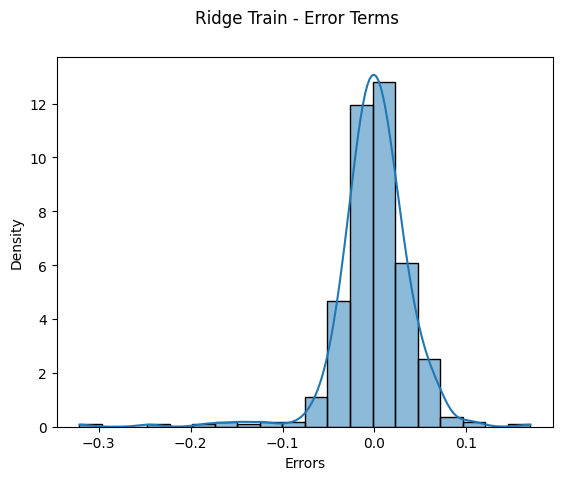

In [55]:
sns.histplot(ridge.predict(X_test)-y_test, stat='density', kde=True, bins=20)

plt.suptitle('Ridge Train - Error Terms')
plt.xlabel('Errors')

plt.show()

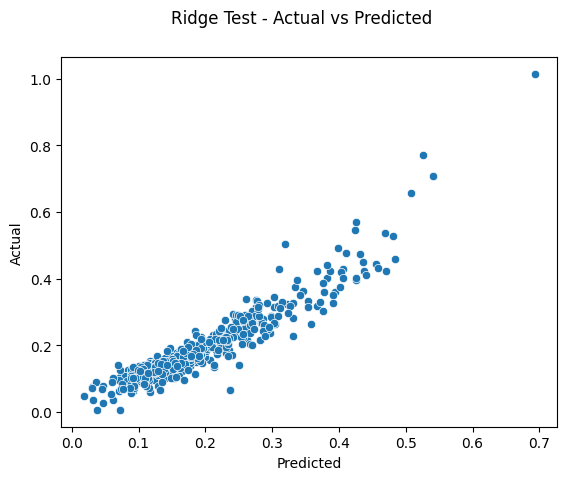

In [56]:
sns.scatterplot(x=ridge.predict(X_test), y=y_test)

plt.suptitle('Ridge Test - Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

## Step 5: Conclusion 

In [57]:
regression_metrics

,Linear,Ridge,Lasso
R2 Score (Train),9.367446e-01,0.885897,0.895105
R2 Score (Test),-2.570889e+21,0.870696,0.864361
RSS (Train),7.975898e-01,1.438732,1.322625
RSS (Test),1.407576e+22,0.707947,0.742629
MSE (Train),7.858028e-04,0.001417,0.001303
MSE (Test),3.228384e+19,0.001624,0.001703
RMSE (Train),2.803217e-02,0.037649,0.036098
RMSE (Test),5.681887e+09,0.040296,0.041271


We can see that the Ridge Regression model is doing better than the Lasso and Linear Regression models. 

The most important predictor variables are,

1. Ridge Regression:

| Feature                | Coefficient             |
|------------------------|-------------------------|
| GrLivArea              | 0.114259                |
| OverallQual            | 0.098885                |
| 2ndFlrSF               | 0.082416                |
| GarageCars             | 0.068762                |
| Condition2_PosN        | -0.066828               |
| Neighborhood_NoRidge   | 0.059324                |
| RoofMatl_WdShngl       | 0.053328                |
| TotalBsmtSF            | 0.043470                |
| Neighborhood_StoneBr   | 0.042255                |
| FullBath               | 0.040968                |

2. Lasso Regression 

| Feature                | Lasso                   |
|------------------------|-------------------------|
| Condition2_PosN        | -0.340414               |
| GrLivArea              | 0.339689                |
| OverallQual            | 0.123430                |
| RoofMatl_WdShngl       | 0.074416                |
| GarageCars             | 0.067505                |
| Neighborhood_NoRidge   | 0.058470                |
| Neighborhood_NridgHt   | 0.043794                |
| Neighborhood_StoneBr   | 0.042549                |
| 2ndFlrSF               | 0.040143                |
| RoofMatl_CompShg       | 0.033650                |
